# INIT & IMPORTS

In [1]:
import pandas as pd
import pymongo
import seaborn as sns

mc = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = mc['RedditToxicity']
session = mc.start_session()
myCols = {}
myCols['Authors'] = mydb['Authors']
myCols['Comments'] = mydb['Comments']
myCols['Subreddits'] = mydb['Subreddits']

# Exploration

## Combien de message supprimé ? 

           _id    count
0  Not Deleted    33626
1         None  7489706
2      Deleted     1055


<Axes: xlabel='_id', ylabel='count'>

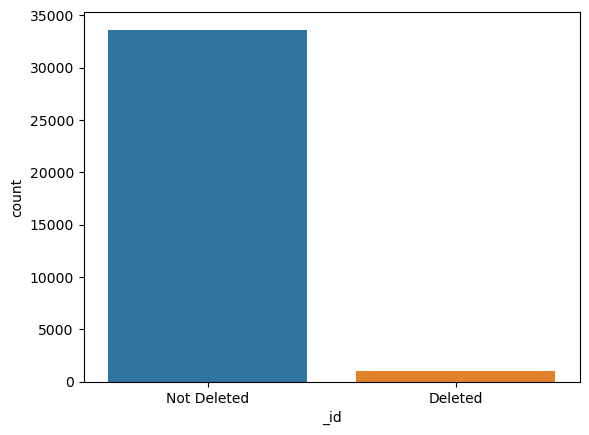

In [27]:
res = myCols['Comments'].aggregate([
    {"$group": {
        "_id": "$deleted",
        "count": {"$sum": 1}}}
    ])
df = pd.DataFrame(res)
print(df)
sns.barplot(df, x="_id", y="count")


## Combien de message supprimé par les utilisateurs vs par les admins ? 
- éffacé = Enlevé par les modérateurs
- supprimé = Enlevé par l'utilisateur
- Removed by Reddit = Enlevé par reddit lui meme pcq respecte pas les conditions globales

                     _id  count
0               [effacé]   1143
1             [supprimé]    743
2  [ Removed by Reddit ]      3


<Axes: xlabel='_id', ylabel='count'>

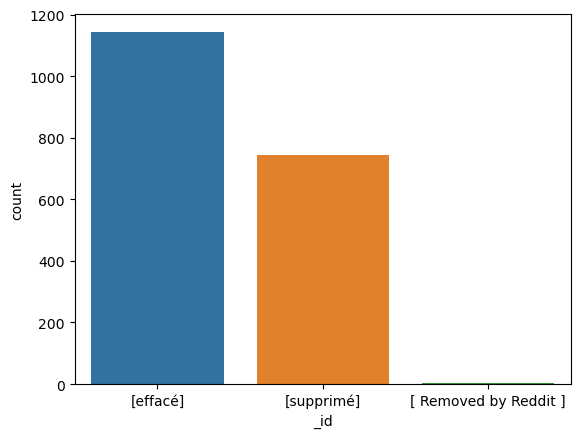

In [26]:
res = myCols['Comments'].aggregate([
    {"$match": {"newBody": {"$in": ["[effacé]", "[supprimé]","[ Removed by Reddit ]"]}}},
    {"$group": {"_id": "$newBody", "count": {"$sum": 1}}}
])
df = pd.DataFrame(res)
print(df)
sns.barplot(df, x="_id", y="count")

## Sample de message pour chaque catégories

### Messages éffacés

In [16]:
pipeline = [
    {"$match": {"newBody": "[effacé]"}},
    {"$sample": {"size": 10}}
]

result = myCols['Comments'].aggregate(pipeline)
for doc in result:
    print(doc['body'])
    print('--------------------------------')

This would be hilarious if it's intention wasn't inherently evil. Number 10 had me carefully reading each word out loud just to try and understand it lol

Someone correct me if I am wrong but they just want you to put a "t" in circle 1??? lol College degree and I'd be worried if I could do this in 10 minutes.
--------------------------------
Disagree. Played a shit ton of classic wow and this is always where we tanked baron. The bomb doesn’t need to run far, only to the other edge of the tunnel.
--------------------------------
Literally 0%. Anyone who is unironically worried needs to get out of their reddit echo chambers and go outside.
--------------------------------
I should have been more specific. I meant as a starting point. Shart can become strong, sure, but I hate playing with her early on.
--------------------------------
There are extremists in literally every group. Most feminists are nothing like her and do not share her beliefs.
--------------------------------
Humans are

### Messages supprimés

In [17]:
pipeline = [
    {"$match": {"newBody": "[supprimé]"}},
    {"$sample": {"size": 10}}
]

result = myCols['Comments'].aggregate(pipeline)
for doc in result:
    print(doc['body'])
    print('--------------------------------')

Trumps winning. Canada 52 after Greenland
--------------------------------
It’s often just part of their work. Sounds like you had a pretty authentic experience
--------------------------------
Off with his head!
--------------------------------
😂😂
--------------------------------
A public toilet seat is cleaner than a smartphone.
--------------------------------
Bruh that's so sad and pathetic lmao if you ever feel like you're useless just think of OP
--------------------------------
The rise of fascism, or authoritarianism more broadly, is a serious concern in many parts of the world. While full-fledged fascist regimes may not be as prevalent today as they were in the 20th century, the underlying tendencies—such as extreme nationalism, suppression of dissent, erosion of democratic institutions, and scapegoating of minorities—are visible in various governments and political movements.
--------------------------------
It’s not gay if you don’t like it💩
--------------------------------


### Messages supprimés par Reddit

In [24]:
pipeline = [
    {"$match": {"newBody": "[ Removed by Reddit ]"}},
    {"$sample": {"size": 10}}
]

result = myCols['Comments'].aggregate(pipeline)
for doc in result:
    print(doc['body'])
    print('--------------------------------')

Someone needs to stand up to this literal Nazi. Musk is the type who dies by guillotine after all.
--------------------------------
Musk is the enemy of the people. Musk must die before he kills us.
--------------------------------
